<a href="https://colab.research.google.com/github/sukeerthisrinivasan-tech/AI-Powered-Sentiment-Analysis-for-ChatGPT-Reviews/blob/main/guvi_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta
import faker

# Initialize fake data generator
fake = faker.Faker()

# -------------------------------
# Synthetic review templates
# -------------------------------
positive_titles = [
    "Amazing tool!", "Highly impressed", "Exceeded expectations",
    "Super helpful!", "Great AI experience", "Love this app"
]
positive_reviews = [
    "ChatGPT makes my work so much easier and saves me hours every week.",
    "The responses are quick, intelligent, and incredibly natural.",
    "I use it daily for coding, writing, and learning — fantastic performance!",
    "Super useful assistant for research and brainstorming.",
    "The app runs smoothly and delivers quality answers every time."
]

neutral_titles = [
    "It’s okay", "Decent but not great", "Average performance",
    "Could be better", "Mixed feelings", "Fine overall"
]
neutral_reviews = [
    "Sometimes gives great answers, other times not so much.",
    "Decent experience, but it occasionally misunderstands prompts.",
    "The interface is fine, though responses can be inconsistent.",
    "Not bad, but doesn’t always provide accurate info.",
    "It’s useful but could improve response variety."
]

negative_titles = [
    "Disappointed", "Poor results", "Not worth it",
    "Frustrating experience", "Keeps crashing", "Needs major improvement"
]
negative_reviews = [
    "The responses are often wrong and repetitive.",
    "It keeps crashing and losing my chats.",
    "Way too slow and gives irrelevant answers.",
    "Not as smart as advertised — very limited help.",
    "Frustrating to use, responses make no sense sometimes."
]

# -------------------------------
# Helper function to generate random rows
# -------------------------------
def generate_reviews(sentiment, n):
    data = []
    if sentiment == "Positive":
        titles, reviews, rating_range = positive_titles, positive_reviews, [4, 5]
    elif sentiment == "Neutral":
        titles, reviews, rating_range = neutral_titles, neutral_reviews, [3]
    else:
        titles, reviews, rating_range = negative_titles, negative_reviews, [1, 2]

    for _ in range(n):
        review_text = random.choice(reviews)
        title = random.choice(titles)
        rating = random.choice(rating_range)
        date = datetime.today() - timedelta(days=random.randint(0, 365))
        username = fake.user_name()
        helpful = random.randint(0, 50)
        platform = random.choice(["Web", "Mobile"])
        language = "en"
        location = random.choice(["USA", "India", "UK", "Canada", "Australia"])
        version = random.choice(["3.5", "4.0"])
        verified = random.choice(["Yes", "No"])
        review_len = len(review_text)
        data.append([date.date(), title, review_text, rating, username,
                     helpful, review_len, platform, language, location,
                     version, verified])
    return data

# -------------------------------
# Generate dataset
# -------------------------------
data = []
data += generate_reviews("Positive", 100)
data += generate_reviews("Neutral", 100)
data += generate_reviews("Negative", 100)

columns = [
    "date", "title", "review", "rating", "username",
    "helpful_votes", "review_length", "platform", "language",
    "location", "version", "verified_purchase"
]

df_synth = pd.DataFrame(data, columns=columns)

# Save to CSV
df_synth.to_csv("synthetic_chatgpt_reviews.csv", index=False)
print("✅ Synthetic dataset generated successfully!")
print(df_synth.head())


✅ Synthetic dataset generated successfully!
         date                title  \
0  2025-03-09  Great AI experience   
1  2025-05-17       Super helpful!   
2  2025-02-25        Amazing tool!   
3  2024-11-04        Amazing tool!   
4  2025-03-22  Great AI experience   

                                              review  rating        username  \
0  The responses are quick, intelligent, and incr...       4         xmartin   
1  The app runs smoothly and delivers quality ans...       4  kaylarodriguez   
2  The app runs smoothly and delivers quality ans...       4      jonesedwin   
3  I use it daily for coding, writing, and learni...       4        joseph84   
4  The app runs smoothly and delivers quality ans...       5      edwardbyrd   

   ...  platform  language location version verified_purchase  
0  ...    Mobile        en   Canada     4.0               Yes  
1  ...       Web        en    India     4.0                No  
2  ...       Web        en      USA     3.5           

In [ ]:
import pandas as pd

# 1️⃣ Load both datasets
original_df = pd.read_excel("chatgpt_style_reviews_dataset.xlsx")          # your real dataset
synthetic_df = pd.read_csv("synthetic_chatgpt_reviews.csv")  # generated dataset

print("Original dataset size:", len(original_df))
print("Synthetic dataset size:", len(synthetic_df))

# 2️⃣ Make sure columns match
print("Original columns:", original_df.columns)
print("Synthetic columns:", synthetic_df.columns)

# Align columns if needed (optional)
synthetic_df = synthetic_df[original_df.columns]

# 3️⃣ Combine the datasets
combined_df = pd.concat([original_df, synthetic_df], ignore_index=True)

# 4️⃣ Remove duplicates (in case of overlaps)
combined_df.drop_duplicates(subset=['review', 'rating', 'username'], inplace=True)


# 5️⃣ Shuffle the combined dataset
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# 6️⃣ Save to new CSV
combined_df.to_csv("expanded_chatgpt_reviews.csv", index=False)

print("✅ Combined dataset created successfully!")
print("Total samples after combining:", len(combined_df))
combined_df.head()

Original dataset size: 250
Synthetic dataset size: 300
Original columns: Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')
Synthetic columns: Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')
✅ Combined dataset created successfully!
Total samples after combining: 550


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,########,Article sign energy fish hot kind.,Information language easy interesting computer...,3,dgreen,3,18,Flipkart,de,Ethiopia,1.7.3,Yes
1,########,High human concern whole tend become system cl...,Student child ball store process law western. ...,2,wmitchell,171,23,Website,es,Zimbabwe,4.8.5,Yes
2,2025-03-14,Poor results,It keeps crashing and losing my chats.,1,nicholsshelby,41,38,Mobile,en,USA,3.5,No
3,2024-06-01 00:00:00,Sea home tough deal that finally stand.,Forget while police fight commercial push conc...,3,kmoore,157,23,App Store,hi,Wallis and Futuna,1.1.6,No
4,2025-10-28,Needs major improvement,Way too slow and gives irrelevant answers.,2,williamskristen,19,42,Mobile,en,USA,3.5,Yes


In [ ]:
# ==========================================
# STEP 1: Import Libraries
# ==========================================
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (only once)
nltk.download('stopwords')
nltk.download('wordnet')

# ==========================================
# STEP 2: Load Dataset
# ==========================================
df = pd.read_csv("expanded_chatgpt_reviews.csv")

# Preview
print("Before Cleaning:\n", df.head())

# ==========================================
# STEP 3: Handle Missing Values
# ==========================================
# Drop completely empty rows
df.dropna(subset=['review', 'rating'], inplace=True)

# Fill missing text fields with empty strings
df['title'] = df['title'].fillna('')
df['review'] = df['review'].fillna('')

# ==========================================
# STEP 4: Combine title + review text
# ==========================================
df['text'] = df['title'] + " " + df['review']

# ==========================================
# STEP 5: Clean Text
# ==========================================
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

# ==========================================
# STEP 6: Fix Ratings and Sentiments
# ==========================================
# Ensure numeric ratings
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df.dropna(subset=['rating'], inplace=True)

# Define sentiment labels
def get_sentiment(r):
    if r <= 2:
        return 'Negative'
    elif r == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment'] = df['rating'].apply(get_sentiment)

# ==========================================
# STEP 7: Clean Duplicates and Save
# ==========================================
df.drop_duplicates(subset='clean_text', inplace=True)

# Save cleaned dataset
df.to_csv("cleaned_reviews.csv", index=False)

print("\n✅ Data Cleaning Completed!")
print("Cleaned dataset shape:", df.shape)
print(df[['rating', 'sentiment', 'clean_text']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Before Cleaning:
                   date                                              title  \
0             ########                 Article sign energy fish hot kind.   
1             ########  High human concern whole tend become system cl...   
2           2025-03-14                                       Poor results   
3  2024-06-01 00:00:00            Sea home tough deal that finally stand.   
4           2025-10-28                            Needs major improvement   

                                              review  rating         username  \
0  Information language easy interesting computer...       3           dgreen   
1  Student child ball store process law western. ...       2        wmitchell   
2             It keeps crashing and losing my chats.       1    nicholsshelby   
3  Forget while police fight commercial push conc...       3           kmoore   
4         Way too slow and gives irrelevant answers.       2  williamskristen   

   helpful_votes  review_length 

In [ ]:
# Install libraries (if not installed)
!pip install pandas matplotlib seaborn wordcloud

# Import required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the cleaned dataset
df = pd.read_csv("cleaned_reviews.csv")

# Quick look
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (336, 15)


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,text,clean_text,sentiment
0,########,Article sign energy fish hot kind.,Information language easy interesting computer...,3,dgreen,3,18,Flipkart,de,Ethiopia,1.7.3,Yes,Article sign energy fish hot kind. Information...,article sign energy fish hot kind information ...,Neutral
1,########,High human concern whole tend become system cl...,Student child ball store process law western. ...,2,wmitchell,171,23,Website,es,Zimbabwe,4.8.5,Yes,High human concern whole tend become system cl...,high human concern whole tend become system cl...,Negative
2,2025-03-14,Poor results,It keeps crashing and losing my chats.,1,nicholsshelby,41,38,Mobile,en,USA,3.5,No,Poor results It keeps crashing and losing my c...,poor result keep crashing losing chat,Negative
3,2024-06-01 00:00:00,Sea home tough deal that finally stand.,Forget while police fight commercial push conc...,3,kmoore,157,23,App Store,hi,Wallis and Futuna,1.1.6,No,Sea home tough deal that finally stand. Forget...,sea home tough deal finally stand forget polic...,Neutral
4,2025-10-28,Needs major improvement,Way too slow and gives irrelevant answers.,2,williamskristen,19,42,Mobile,en,USA,3.5,Yes,Needs major improvement Way too slow and gives...,need major improvement way slow give irrelevan...,Negative


/tmp/ipython-input-735095416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


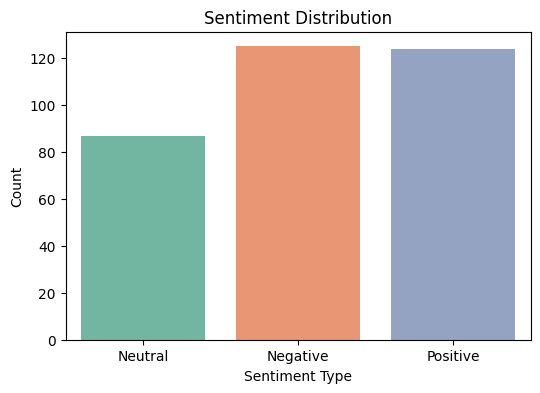

/tmp/ipython-input-735095416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='coolwarm')


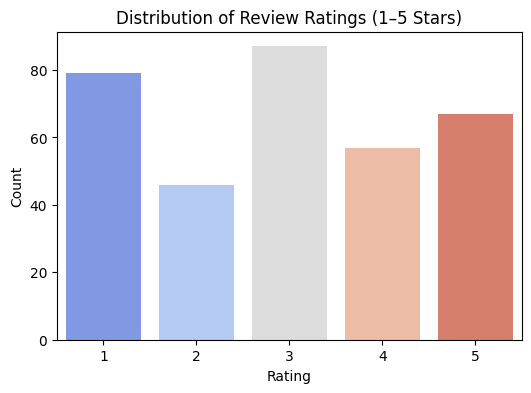

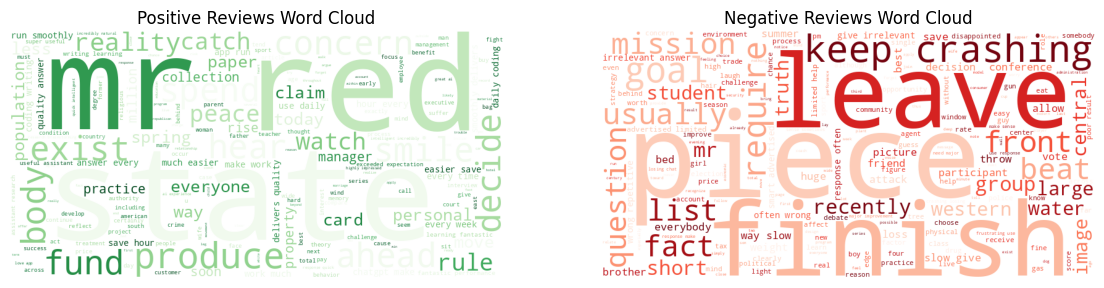

/tmp/ipython-input-735095416.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


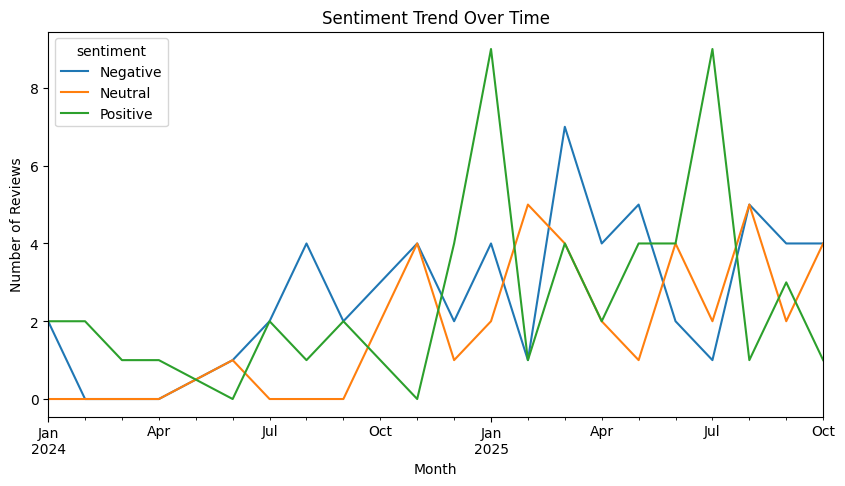

/tmp/ipython-input-735095416.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='rating', data=df[df['location'].isin(top_locations)], palette='viridis')


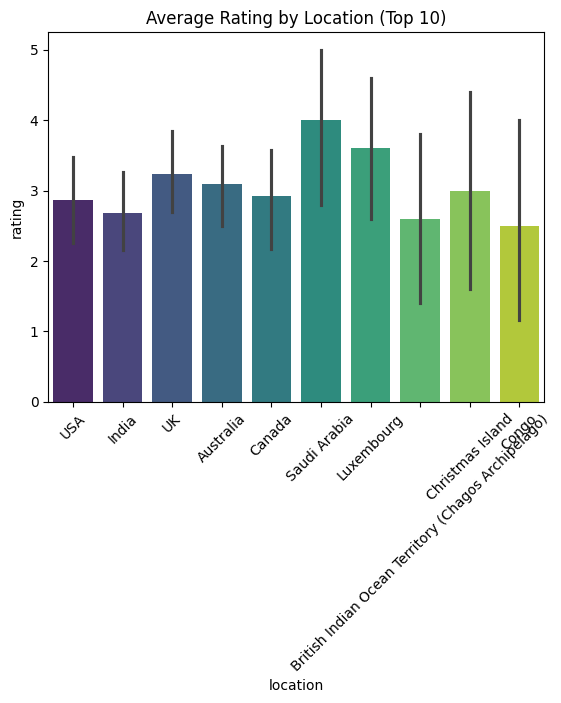

/tmp/ipython-input-735095416.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='rating', data=df, palette='Set3')


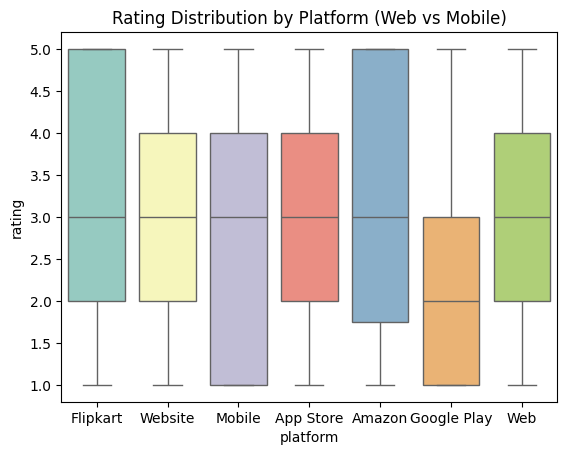

/tmp/ipython-input-735095416.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='verified_purchase', y='rating', data=df, palette='cool')


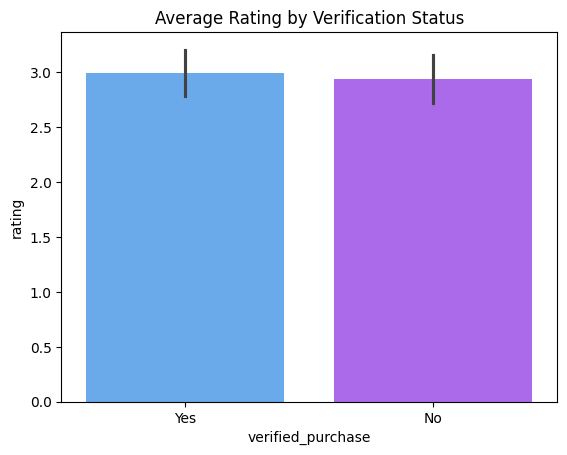

/tmp/ipython-input-735095416.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=df, palette='pastel')


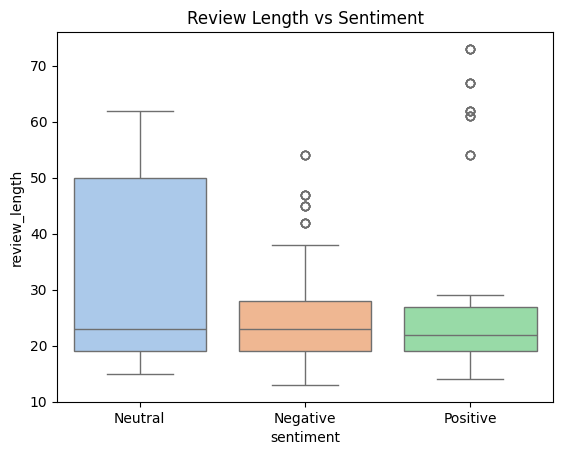

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df, palette='coolwarm')
plt.title("Distribution of Review Ratings (1–5 Stars)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Separate text by sentiment
positive_text = " ".join(df[df['sentiment']=='Positive']['clean_text'])
negative_text = " ".join(df[df['sentiment']=='Negative']['clean_text'])
# Generate word clouds
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
plt.imshow(WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text))
plt.axis("off")
plt.title("Positive Reviews Word Cloud")
plt.subplot(1,2,2)
plt.imshow(WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text))
plt.axis("off")
plt.title("Negative Reviews Word Cloud")
plt.show()

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.to_period('M')
monthly_sentiment = df.groupby(['month','sentiment']).size().unstack().fillna(0)
monthly_sentiment.plot(kind='line', figsize=(10,5))
plt.title("Sentiment Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.show()

top_locations = df['location'].value_counts().head(10).index
sns.barplot(x='location', y='rating', data=df[df['location'].isin(top_locations)], palette='viridis')
plt.title("Average Rating by Location (Top 10)")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='platform', y='rating', data=df, palette='Set3')
plt.title("Rating Distribution by Platform (Web vs Mobile)")
plt.show()

sns.barplot(x='verified_purchase', y='rating', data=df, palette='cool')
plt.title("Average Rating by Verification Status")
plt.show()

sns.boxplot(x='sentiment', y='review_length', data=df, palette='pastel')
plt.title("Review Length vs Sentiment")
plt.show()



In [ ]:
!pip install transformers torch datasets scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset

# Load your cleaned dataset
df = pd.read_csv("cleaned_reviews.csv")

# Keep only required columns
df = df[['clean_text', 'sentiment']].dropna()

# Encode sentiment labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])

# Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# Convert to HuggingFace Dataset format
train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "distilbert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install scikit-learn xgboost joblib pandas seaborn matplotlib

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("cleaned_reviews.csv")
df = df[['clean_text', 'sentiment']].dropna()

# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])

# TF-IDF features
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'].astype(str))
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Evaluate
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Save models
joblib.dump(xgb_model, "sentiment_xgb_tfidf.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")


Accuracy: 0.6176470588235294
              precision    recall  f1-score   support

    Negative       0.58      0.72      0.64        25
     Neutral       0.62      0.56      0.59        18
    Positive       0.67      0.56      0.61        25

    accuracy                           0.62        68
   macro avg       0.62      0.61      0.61        68
weighted avg       0.62      0.62      0.62        68



['label_encoder.pkl']

In [ ]:
xgb_model = joblib.load("sentiment_xgboost_model.pkl")
le = joblib.load("label_encoder.pkl")


In [ ]:
import os
print("Model saved in:", os.getcwd())


In [ ]:
import joblib
from sentence_transformers import SentenceTransformer

# Load saved model and label encoder
xgb_model = joblib.load("sentiment_xgboost_model.pkl")
le = joblib.load("label_encoder.pkl")

# Load same embedding model used during training
sbert = SentenceTransformer('all-MiniLM-L6-v2')

# Example prediction
review = "The app crashes often and gives wrong answers."
embedding = sbert.encode([review])
pred = xgb_model.predict(embedding)
print("Predicted Sentiment:", le.inverse_transform(pred)[0])
